In [7]:
!pip install pymongo>=3.9.0

DEPRECATION: google-images-search 1.4.6 has a non-standard dependency specifier click>=7.0<=8.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of google-images-search or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import pyRAPL
pyRAPL.setup()

@pyRAPL.measure
def main(times):
    result = 0
    for i in times:
        result += i

    return result

result = main(1000000)

FileNotFoundError: [Errno 2] No such file or directory: '/sys/devices/system/cpu/present'

In [1]:
import numpy as np

import sys
sys.path.insert(0, '../liset_tk/')
from liset_tk import liset_tk

In [2]:
data_path = '../../data/CNN_TRAINING_SESSIONS/Amigo2_1_hippo_2019-07-11_11-57-07_1150um'
liset = liset_tk(data_path, shank=3, downsample=1250, numSamples=1000000)

Downsampling data from 30000 Hz to 1250 Hz... Done!
Normalizing data... Done!
Shape of loaded data after downsampling and z-score:  (41667, 8)


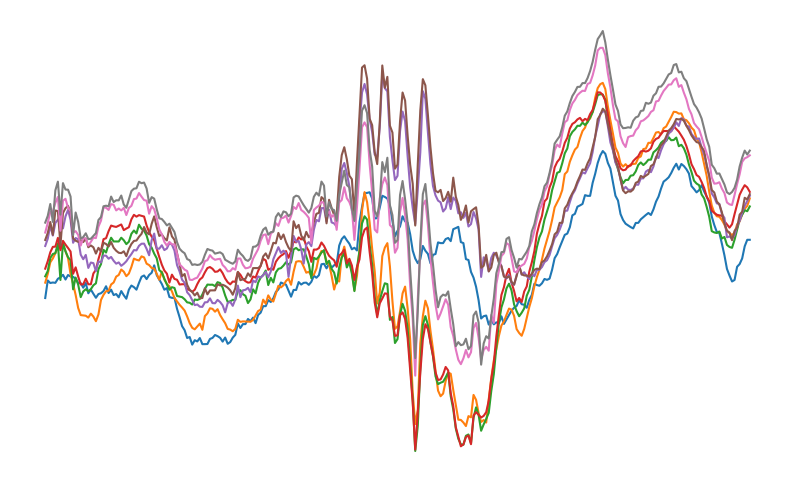

In [3]:
liset.plot_event(liset.ripples_GT[15], extend=120, offset=0.4, plain=True)

In [4]:
liset.savefig('../report/figures/portrait.svg')

### **Load the data**

In [7]:
ripples = np.load('../../validation_ripples.npy')
predictions = np.load('../../pytorchSNN_predictions.npy')
SNN_output = np.load('../../output.npy')

In [9]:
validate = modelEval(ripples, 'SNN')

In [13]:
preds = detect_rate_increase(SNN_output)
validate(preds)

{'correct_predictions': '1247.00',
 'total_predictions': '4633.00',
 'total_gt': '1309.00',
 'precision': '0.27',
 'recall': '0.95'}

In [8]:
SNN_output[SNN_output == 0] = None

In [4]:
path = '../../Amigo2_1_hippo_2019-07-11_11-57-07_1150um'
liset = liset_tk(path, shank=3, downsample=4000, numSamples=30000000)

Downsampling data from 30000 Hz to 4000 Hz... Done!
Normalizing data... Done!
Shape of loaded data after downsampling and z-score:  (4000000, 8)


In [5]:
channel = bandpass_filter(liset.data[:, 5], [100, 250], 4000)

### **create the figure**

In [33]:
start, stop = 2000000, 2500000
x = np.arange(start/4000, stop / 4000, 1/4000)

hfo_plot = create_fig(
    title = 'Validation test',
    x_axis_label='Time (s)',
    y_axis_label='',
    x = x,
    y_arrays=[
        [channel[start:stop] - 5, 'Filtered LFPs'],
        [liset.data[start:stop, 5], 'Raw LFPs']
        ],
    sizing_mode="stretch_both", 
    tools="pan, box_zoom, wheel_zoom, hover, undo, redo, zoom_in, zoom_out, reset, save",
    tooltips="Data point @x: @y",
    legend_location="top_right"
    )

scatter_plot = hfo_plot.scatter(x, SNN_output[start:stop] * -7, size=2, color="Black", alpha=0.6, legend_label="SNN Output")

hfo_plot.xgrid.visible = False
hfo_plot.ygrid.visible = False

In [34]:
from bokeh.models import BoxAnnotation, LegendItem

mask_ripples = (ripples[:, 1] >= start) & (ripples[:, 0] <= stop)
window_ripples = ripples[mask_ripples] / 4000

for ripple in window_ripples:
    vfill = BoxAnnotation(left=ripple[0], right=ripple[1], fill_alpha=0.3, fill_color='#EC6F8F')
    hfo_plot.add_layout(vfill)

mask_preds = (predictions[:, 1] >= start) & (predictions[:, 0] <= stop)
window_preds = predictions[mask_preds] / 4000

for pred in window_preds:
    vfill = BoxAnnotation(left=pred[0], right=pred[1], fill_alpha=0.3, fill_color='#F7E290')
    hfo_plot.add_layout(vfill)

hfo_plot.yaxis.axis_line_color = None
hfo_plot.yaxis.major_tick_line_color = None
hfo_plot.yaxis.minor_tick_line_color = None
hfo_plot.yaxis.major_label_text_font_size = '0pt'


In [35]:
import bokeh.plotting as bplt

file_path = f"validation_test_plain.html"

# Customize the output file settings
bplt.output_file(filename=file_path, title="Voltage dynamics across time")

# Save the plot
bplt.save(hfo_plot)

'/home/gatta/marcos/LAVA_SNN_ripples/utils/validation_test_plain.html'